In [3]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from ggplot import *

import pandas as pd
import numpy as np
import networkx as nx

import sys
sys.path.append("../..")
from networkentropy import network_energy as ne, network_energy_gradient as neg

In [126]:
num_nodes = 100
p_max = 4
results = []
for p in tqdm(range(1,p_max)):

    generators = {
        'random': nx.erdos_renyi_graph(n=num_nodes, p=p/p_max),
        'smallworld': nx.watts_strogatz_graph(n=num_nodes, k=4, p=p/p_max),
        'waxman': nx.waxman_graph(n=num_nodes, alpha=p/p_max, beta=0.1),
        'powerlaw': nx.powerlaw_cluster_graph(n=num_nodes, m=3, p=p/(p_max*10))
    }
    
    for generator, G in generators.items():
        for method in ['graph', 'laplacian', 'randic']:
            graph_gradients = list(neg.get_energy_gradients(G, method).values())
            for gradient in graph_gradients:
                results.append((p, generator, method, gradient))
            
p, generator, method, gradients = map(list, zip(*results))
df = pd.DataFrame({'p': p, 'generator': generator, 'method': method, 'gradients': gradients})

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.31s/it]


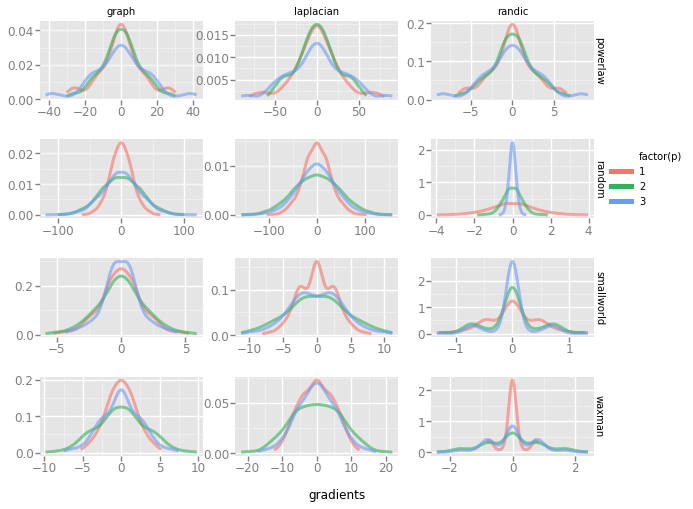

<ggplot: (150312835539)>

In [173]:
ggplot(aes(x='gradients', color='factor(p)'), data=df) + \
geom_density(alpha=0.6, size=3) + \
facet_grid('generator', 'method', scales = "free")

In [175]:
distribution_plots = {}
for method in ['graph', 'laplacian', 'randic']:
    distribution_plots[method] = ggplot(aes(x='gradients'), data=df.loc[df['method']==method]) + \
    geom_density() + \
    facet_grid('p', 'generator', scales = "free_y") + \
    ggtitle(method)

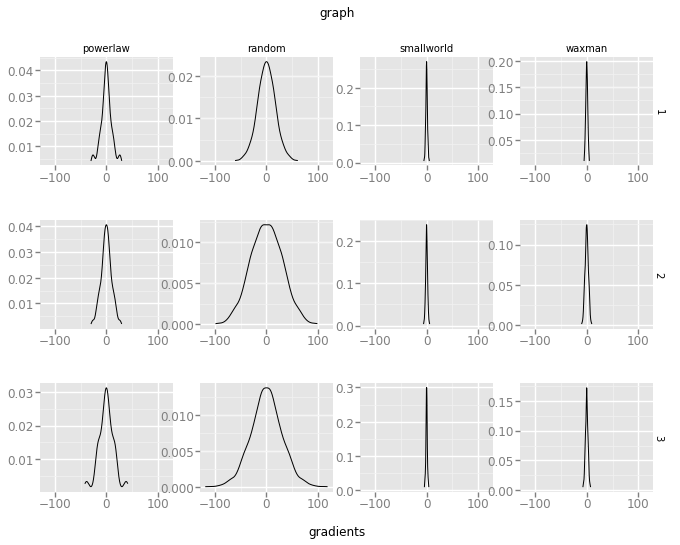

<ggplot: (150314974447)>

In [176]:
distribution_plots['graph']

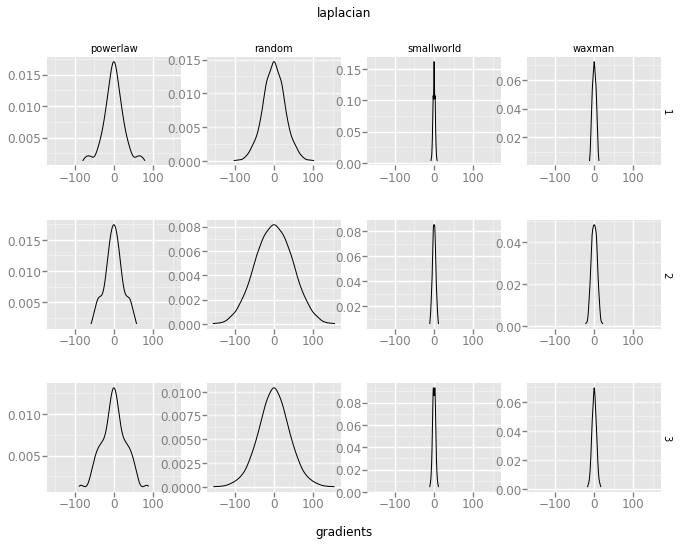

<ggplot: (-9223371886539745634)>

In [177]:
distribution_plots['laplacian']

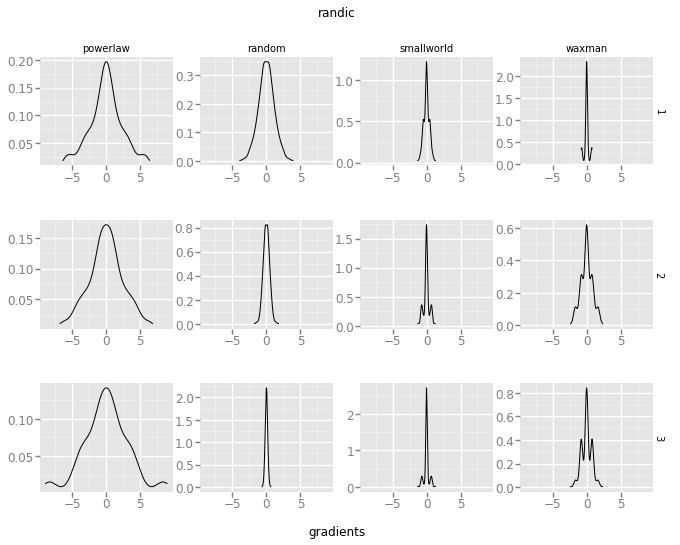

<ggplot: (-9223371886539745550)>

In [178]:
distribution_plots['randic']